<a href="https://colab.research.google.com/github/brewerk/Hello-World/blob/master/LSTM_on_AAPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program uses an artificial recurrent neural network called long short term memory (LSTM)
#              to predict the closing stock price of a corporation ( Apple Inc.) using the past 60 day stock price.

In [2]:
# Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
#Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2019-01-01', end= '2020-11-17')
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.249401
2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.439476
2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,35.909672
2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,35.829746
2019-01-08,37.955002,37.130001,37.389999,37.687500,164101200.0,36.512772
...,...,...,...,...,...,...
2020-11-11,119.629997,116.440002,117.190002,119.489998,112295000.0,119.489998
2020-11-12,120.529999,118.570000,119.620003,119.209999,103162300.0,119.209999
2020-11-13,119.669998,117.870003,119.440002,119.260002,81581900.0,119.260002


In [6]:
#Get the number of rows and coloums in the data set
df.shape

(475, 6)

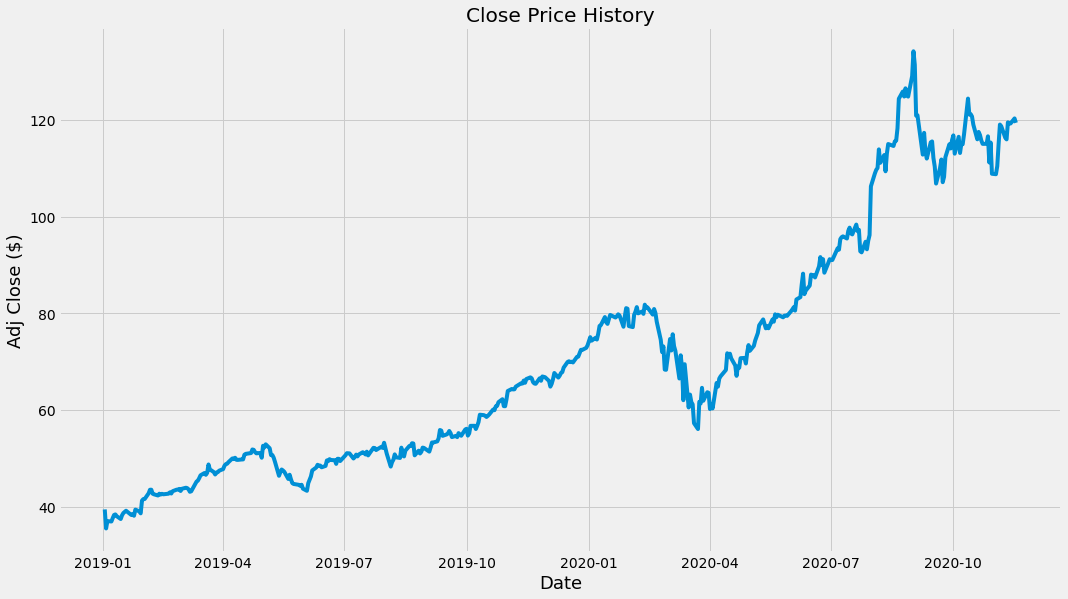

In [7]:
#Visualise the closing price history
plt.figure(figsize=(16,9))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Close ($)', fontsize=18)
plt.show()


In [9]:
#Create a new dataframe with only the close colum
data = df.filter(['Close'])
#Convert the dataframe to a numpy arrary
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) *.8)
training_data_len

380

In [10]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.03987022],
       [0.        ],
       [0.01538538],
       [0.01454893],
       [0.0216967 ],
       [0.02818543],
       [0.02942742],
       [0.02560006],
       [0.0197957 ],
       [0.02757713],
       [0.03231694],
       [0.03464882],
       [0.03708211],
       [0.02816009],
       [0.02973157],
       [0.02663928],
       [0.03946466],
       [0.03576408],
       [0.0316579 ],
       [0.05844929],
       [0.06146555],
       [0.06166832],
       [0.07365726],
       [0.0810838 ],
       [0.08123592],
       [0.07287152],
       [0.07152816],
       [0.06904416],
       [0.07274478],
       [0.07094516],
       [0.07251667],
       [0.07155349],
       [0.07284615],
       [0.0756343 ],
       [0.07317567],
       [0.07801688],
       [0.08121054],
       [0.08146403],
       [0.08283273],
       [0.0784731 ],
       [0.08308621],
       [0.08531672],
       [0.08450561],
       [0.08194562],
       [0.07682559],
       [0.07786481],
       [0.09304741],
       [0.098

In [11]:
#create the training data set
#create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.03987022, 0.        , 0.01538538, 0.01454893, 0.0216967 ,
       0.02818543, 0.02942742, 0.02560006, 0.0197957 , 0.02757713,
       0.03231694, 0.03464882, 0.03708211, 0.02816009, 0.02973157,
       0.02663928, 0.03946466, 0.03576408, 0.0316579 , 0.05844929,
       0.06146555, 0.06166832, 0.07365726, 0.0810838 , 0.08123592,
       0.07287152, 0.07152816, 0.06904416, 0.07274478, 0.07094516,
       0.07251667, 0.07155349, 0.07284615, 0.0756343 , 0.07317567,
       0.07801688, 0.08121054, 0.08146403, 0.08283273, 0.0784731 ,
       0.08308621, 0.08531672, 0.08450561, 0.08194562, 0.07682559,
       0.07786481, 0.09304741, 0.0981421 , 0.10016984, 0.10528983,
       0.11134767, 0.11616355, 0.11238689, 0.1165184 , 0.13408359,
       0.12384357, 0.11798851, 0.11304589, 0.11730414, 0.11793781])]
[0.12105542886200593]



In [12]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [14]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(320, 60, 1)

In [16]:
#Build the LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [18]:
#Compile the model
model.compile(optimizer='adam', loss= 'mean_squared_error')

In [19]:
#train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

320/320 [==============================] - 8s 24ms/step - loss: 0.0028


In [21]:
#Create the testing data set
#Create a new array containing scaled values from index 320
test_data = scaled_data[training_data_len-60:,:]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [22]:
#Convert the data to a numpy array
x_test = np.array(x_test)


In [24]:
#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [25]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [27]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

10.375047061317845

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<function matplotlib.pyplot.show>

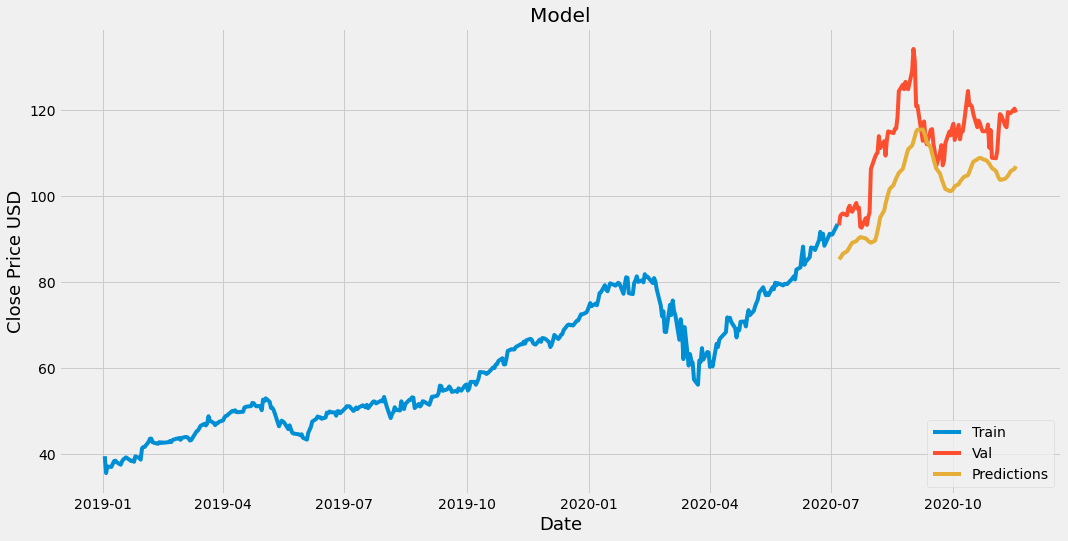

In [28]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualise the data
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show

In [29]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-07-07,93.172501,85.276489
2020-07-08,95.342499,85.612762
2020-07-09,95.752502,86.055382
2020-07-10,95.919998,86.565552
2020-07-13,95.477501,87.100143
...,...,...
2020-11-11,119.489998,104.676727
2020-11-12,119.209999,105.172768
2020-11-13,119.260002,105.734032


In [34]:
#Get the qoute
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 days Closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be data values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create and empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[65.67399]]


In [35]:
#Get the qoute
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(apple_quote2['Close'])

Date
2019-12-18    69.934998
Name: Close, dtype: float64
